In [ ]:
import pandas as pd 
pd.set_option('display.max_columns', 23)
df = pd.read_csv('recipeData.csv',  encoding= 'ISO-8859-1')
df.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75.0,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60.0,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60.0,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60.0,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90.0,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [ ]:
def porcentagem_faltantes(df):
    faltantes = df.isnull().sum()
    faltantes_percentual = (faltantes/df.shape[0]) * 100
    return faltantes_percentual

In [ ]:
porcentagem_faltantes(df)

BeerID            0.000000
Name              0.001806
URL               0.000000
Style             0.865058
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.001806
Color             0.001806
BoilSize          0.001806
BoilTime          0.001806
BoilGravity       5.392617
Efficiency        0.001806
MashThickness    41.932746
SugarScale        0.001806
BrewMethod        0.001806
PitchRate        52.658383
PrimaryTemp      30.580438
PrimingMethod    90.242361
PrimingAmount    93.016326
UserId           66.589612
dtype: float64

In [ ]:
df['StyleID'].value_counts()

7      8698
10     5473
134    1905
4      1576
86     1348
       ... 
99        6
16        5
127       4
73        2
164       2
Name: StyleID, Length: 176, dtype: int64

In [ ]:
# selecionar as linhas onde tem mais de 1000 amostras
selecao = df.loc[df['StyleID'].isin([7, 10, 134, 9, 4, 30, 86, 12, 92, 6, 175, 39])]
selecao.shape

(25998, 23)

In [ ]:
selecao.drop('BeerID', axis=1, inplace=True)
selecao.drop('Name', axis=1, inplace=True)
selecao.drop('URL', axis=1, inplace=True)
selecao.drop('Style', axis=1, inplace=True)
selecao.drop('UserId', axis=1, inplace=True)
selecao.drop('PrimingMethod', axis=1, inplace=True)
selecao.drop('PrimingAmount', axis=1, inplace=True)

<ipython-input-7-5badf94e61dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao.drop('BeerID', axis=1, inplace=True)
<ipython-input-7-5badf94e61dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao.drop('Name', axis=1, inplace=True)
<ipython-input-7-5badf94e61dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao.drop('URL', axis=1, inplace=True)
<ipython-input-7-5badf94e61dc>:4: SettingWithCopyWarning: 
A value is

In [ ]:
selecao.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60.0,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60.0,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70.0,1.047,79.0,NaN,Specific Gravity,All Grain,1.0,NaN
6,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90.0,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN
9,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60.0,1.058,70.0,NaN,Specific Gravity,All Grain,NaN,21.11


In [ ]:
selecao.dtypes

StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime         float64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
dtype: object

In [ ]:
# vendo as informações das colunas que paresentaram tipos diferentes
df['SugarScale'].value_counts()

Specific Gravity    53900
Plato                1471
Name: SugarScale, dtype: int64

In [ ]:
df['BrewMethod'].value_counts()

All Grain       37241
BIAB             8509
extract          6774
Partial Mash     2847
Name: BrewMethod, dtype: int64

In [ ]:
# trocando os valores 
selecao['SugarScale'] = selecao['SugarScale'].replace('Specific Gravity', 0)
selecao['SugarScale'] = selecao['SugarScale'].replace('Plato', 1)

# transformando variáveis textos na coluna 'BrewMethod' em categorias com one hot encoding 
brewmethod_encode = pd.get_dummies(selecao['BrewMethod'])
# excluindo a coluna texto 'BrewMethod
selecao.drop('BrewMethod', axis=1, inplace=True)
# inserindo as variáveis one hot encode novamente no dataset
concatenando = pd.concat([selecao, brewmethod_encode], axis=1)

<ipython-input-12-0f80b8790c2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao['SugarScale'] = selecao['SugarScale'].replace('Specific Gravity', 0)
<ipython-input-12-0f80b8790c2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao['SugarScale'] = selecao['SugarScale'].replace('Plato', 1)
<ipython-input-12-0f80b8790c2d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
concatenando.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,PitchRate,PrimaryTemp,All Grain,BIAB,Partial Mash,extract
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60.0,NaN,70.0,NaN,0.0,NaN,NaN,0,0,0,1
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60.0,NaN,70.0,NaN,0.0,NaN,NaN,1,0,0,0
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70.0,1.047,79.0,NaN,0.0,1.0,NaN,1,0,0,0
6,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90.0,NaN,75.0,NaN,0.0,NaN,NaN,1,0,0,0
9,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60.0,1.058,70.0,NaN,0.0,NaN,21.11,1,0,0,0


In [ ]:
porcentagem_faltantes(concatenando)

StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.003846
Color             0.003846
BoilSize          0.003846
BoilTime          0.003846
BoilGravity       4.988845
Efficiency        0.003846
MashThickness    42.453266
SugarScale        0.003846
PitchRate        54.684976
PrimaryTemp      31.525502
All Grain         0.000000
BIAB              0.000000
Partial Mash      0.000000
extract           0.000000
dtype: float64

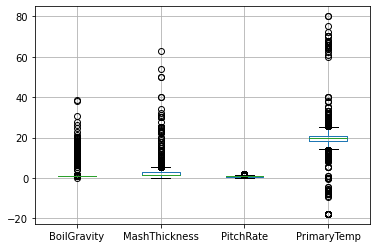

In [ ]:
import matplotlib.pyplot as plt 
concatenando.boxplot(column=['BoilGravity', 'MashThickness', 'PitchRate', 'PrimaryTemp'])
plt.show()

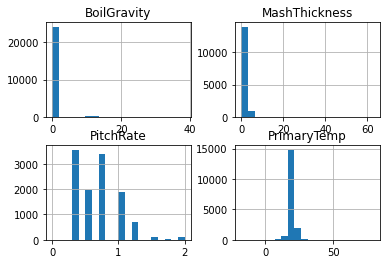

In [ ]:
concatenando.hist(column = ['BoilGravity', 'MashThickness', 'PitchRate', 'PrimaryTemp'], bins=20)
plt.show()

In [ ]:
concatenando['PitchRate'].fillna(concatenando['PitchRate'].mean(), inplace=True)
concatenando.fillna(concatenando.median(), inplace=True)

In [ ]:
porcentagem_faltantes(concatenando)

StyleID          0.0
Size(L)          0.0
OG               0.0
FG               0.0
ABV              0.0
IBU              0.0
Color            0.0
BoilSize         0.0
BoilTime         0.0
BoilGravity      0.0
Efficiency       0.0
MashThickness    0.0
SugarScale       0.0
PitchRate        0.0
PrimaryTemp      0.0
All Grain        0.0
BIAB             0.0
Partial Mash     0.0
extract          0.0
dtype: float64

In [ ]:
# definindo variáveis preditoras e variável target 
y = concatenando['StyleID']
x = concatenando.drop('StyleID', axis=1)

In [ ]:
def modelos(a, b):
    from sklearn.linear_model    import LogisticRegression
    from sklearn.naive_bayes     import GaussianNB
    from sklearn.tree            import DecisionTreeClassifier
    from sklearn.neighbors       import KNeighborsClassifier
    from sklearn.preprocessing   import MinMaxScaler
    from sklearn.model_selection import StratifiedKFold, cross_val_score
    
    skfold = StratifiedKFold(n_splits=3)
    x, y   = a, b
    
    # normalizando as variáveis preditoras para o KNN
    normalizador = MinMaxScaler(feature_range=(0, 1))
    X            = normalizador.fit_transform(x)
    
    logist = LogisticRegression()
    naive  = GaussianNB()
    tree   = DecisionTreeClassifier()
    knn    = KNeighborsClassifier()
    
    r_logist = cross_val_score(logist ,x , y, cv=skfold) 
    r_naive  = cross_val_score(naive  ,x , y, cv=skfold) 
    r_tree   = cross_val_score(tree   ,x , y, cv=skfold) 
    r_knn    = cross_val_score(knn    ,X , y, cv=skfold) 
    
    d_calssmodels = {'Logística':r_logist.mean(), 'Naive Bayes':r_naive.mean(), 'Decision Tree':r_tree.mean(), 'KNN':r_knn.mean()}
    melhor_modelo = max(d_calssmodels, key=d_calssmodels.get)
    
    print(f'Regressão Logistica: {r_logist.mean()} \nNaive Bayes: {r_naive.mean()} \nDecision Tree: {r_tree.mean()} \nKNN: {r_knn.mean()}')
    print(f'O melhor modelo foi: {melhor_modelo}, com o valor: {d_calssmodels[melhor_modelo]}')

In [ ]:
modelos(x, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Regressão Logistica: 0.442495576582814 
Naive Bayes: 0.3967997538272175 
Decision Tree: 0.47238249096084317 
KNN: 0.4716132010154627
O melhor modelo foi: Decision Tree, com o valor: 0.47238249096084317
